# Nội dung thực hành  

1. Thu thập dữ liệu từ nhiều nguồn website (cả cấu trúc và dữ liệu)  
2. Lưu dữ liệu đã thu thập vào MySQL  
3. Thực hành nội dung 1 và 2 cho dự án CK  

# Thu thập dữ liệu từ nhiều nguồn website  

## Danh sách các nguồn dữ liệu tham khảo

1. https://quotes.toscrape.com/  
2. https://parade.com/937586/parade/life-quotes/ && https://parade.com/940913/parade/funny-quotes/  
3. https://www.shopify.com/ph/blog/motivational-quotes#  
4. https://www.today.com/life/quotes/inspirational-quotes-rcna30589  
5. https://www.themuse.com/advice/45-inspirational-quotes-that-will-get-you-through-the-work-week  
6. https://www.goodreads.com/quotes/tag/life  
7. 

In [1]:
%cd /mnt/DataK/Project
# !scrapy startproject quotescrawl 

/mnt/DataK/Project


In [2]:
%cd quotescrawl/quotescrawl/spiders/ 

/mnt/DataK/Project/quotescrawl/quotescrawl/spiders


In [3]:
!cat domains.py

# -*- coding: utf-8 -*-
import scrapy


class Domain_1(scrapy.Spider):
    name = "Domain_1_toscrape-css"
    start_urls = [
        'http://quotes.toscrape.com/',
    ]

    def parse(self, response):
        # parse qua được 10 trang và lấy được 100 câu châm ngôn
        for quote in response.css("div.quote"):
            yield {
                'text': quote.css("span.text::text").extract_first(),
                'author': quote.css("small.author::text").extract_first(),
                'tags': quote.css("div.tags > a.tag::text").extract()
            }

        next_page_url = response.css("li.next > a::attr(href)").extract_first()
        if next_page_url is not None:
            yield scrapy.Request(response.urljoin(next_page_url))

class Domain_2(scrapy.Spider):
    name = "Domain_2_toscrape-css"
    start_urls = ['https://parade.com/937586/parade/life-quotes/'] #, 'https://parade.com/940913/parade/funny-quotes/']

    def parse(self, response):
        # for quote in response.c

In [4]:
!scrapy list
%cd ../data/ 

Domain_1_toscrape-css
Domain_2_toscrape-css
Domain_5_toscrapy-css
/mnt/DataK/Project/quotescrawl/quotescrawl/data


Ở đây chúng ta sẽ bắt đầu crawl từ nhiều domain khác nhau 

In [5]:
!scrapy crawl Domain_1_toscrape-css -o Domain_1_quotes.csv
!scrapy crawl Domain_5_toscrapy-css -o Domain_5_quotes.csv

2024-03-06 16:18:13 [scrapy.utils.log] INFO: Scrapy 2.11.1 started (bot: quotescrawl)
2024-03-06 16:18:13 [scrapy.utils.log] INFO: Versions: lxml 5.1.0.0, libxml2 2.12.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 23.10.0, Python 3.11.7 (main, Jan 29 2024, 16:03:57) [GCC 13.2.1 20230801], pyOpenSSL 24.0.0 (OpenSSL 3.1.4 24 Oct 2023), cryptography 41.0.7, Platform Linux-6.7.8-zen1-1-zen-x86_64-with-glibc2.39
2024-03-06 16:18:13 [scrapy.addons] INFO: Enabled addons:
[]
2024-03-06 16:18:13 [asyncio] DEBUG: Using selector: EpollSelector
2024-03-06 16:18:13 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-03-06 16:18:13 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-03-06 16:18:13 [scrapy.extensions.telnet] INFO: Telnet Password: 2959df26841ba21d
2024-03-06 16:18:13 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet

In [6]:
!head Domain_1_quotes.csv
!echo '\n\n'
!head Domain_5_quotes.csv

text,author,tags
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”,Albert Einstein,"change,deep-thoughts,thinking,world"
"“It is our choices, Harry, that show what we truly are, far more than our abilities.”",J.K. Rowling,"abilities,choices"
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”,Albert Einstein,"inspirational,life,live,miracle,miracles"
"“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”",Jane Austen,"aliteracy,books,classic,humor"
"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",Marilyn Monroe,"be-yourself,inspirational"
“Try not to become a man of success. Rather become a man of value.”,Albert Einstein,"adulthood,success,value"
“It is better to be hated for what you are than to be loved for what you are not.”,




text,author
“Bet on me? Bet I will.”,Lizzo
"“Before anything else, preparation is the key to success.”",Alexander Graham Bell
"“Stay afraid, but do it anyway. What's important is the action. You don’t have to wait to be confident. Just do it and eventually the confidence will follow.”",Carrie Fisher
“Make each day your masterpiece.”,John Wooden
“Your talent determines what you can do. Your motivation determines how much you’re willing to do. Your attitude determines how well you do it.”,Lou Holtz
"“I learned this, at least, by my experiment; that if one advances confidently in the direction of his dreams, and endeavors to live the life which he has imagined, he will meet with a success unexpected in common hours.”",Henry David Thoreau
“​​We will fail when we fail to try.”,Rosa Parks
"“Don’t count the days, make the days count.”",Muhammad Ali
“I love to see a young girl go out and grab the world by the lapels. Life’s a bitch. You’ve got to go out and kick ass.”,Maya Angelou


# Cho dữ liệu vào cơ sở dữ liệu SQL 

In [7]:
!pip install sqlalchemy pymysql

In [8]:
!pwd

/mnt/DataK/Project/quotescrawl/quotescrawl/data


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Đọc dữ liệu từ các tệp CSV
df1 = pd.read_csv('Domain_1_quotes.csv')
df2 = pd.read_csv('Domain_5_quotes.csv')

# Kiểm tra số lượng cột trong DataFrame df1
if len(df1.columns) == 2:
    # Thêm cột "tags" và gán giá trị null
    df1['tags'] = None
if len(df2.columns) == 2:
    # Thêm cột "tags" và gán giá trị null
    df2['tags'] = None

# Kết hợp với DataFrame từ tệp CSV thứ hai
combined_df = pd.concat([df1, df2], ignore_index=True)

# Tạo kết nối đến cơ sở dữ liệu MySQL
engine = create_engine('mysql+pymysql://root:@localhost/quotes_db', echo=True)

# Lưu DataFrame vào bảng MySQL
combined_df.to_sql('quotes', con=engine, if_exists='replace', index=False)

2024-03-06 16:18:50,552 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-03-06 16:18:50,553 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,556 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-03-06 16:18:50,558 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,560 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-03-06 16:18:50,562 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,565 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-06 16:18:50,571 INFO sqlalchemy.engine.Engine DESCRIBE `quotes_db`.`quotes`
2024-03-06 16:18:50,572 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,578 INFO sqlalchemy.engine.Engine DESCRIBE `quotes_db`.`quotes`
2024-03-06 16:18:50,579 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,585 INFO sqlalchemy.engine.Engine SHOW FULL TABLES FROM `quotes_db`
2024-03-06 16:18:50,587 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-03-06 16:18:50,590 INFO sqlalchemy.e

571

Như vậy đã thêm được 380 (ra 571 ở trên vì chạy lại code 2 lần) dữ liệu bản ghi có các thông tin (quotes content, author, tags) thu thập nhiều nguồn domain khác nhau trên Internet và tổng hợp lại vào CSDL SQL.

Sau đây là hình ảnh dữ liệu thu thập được:

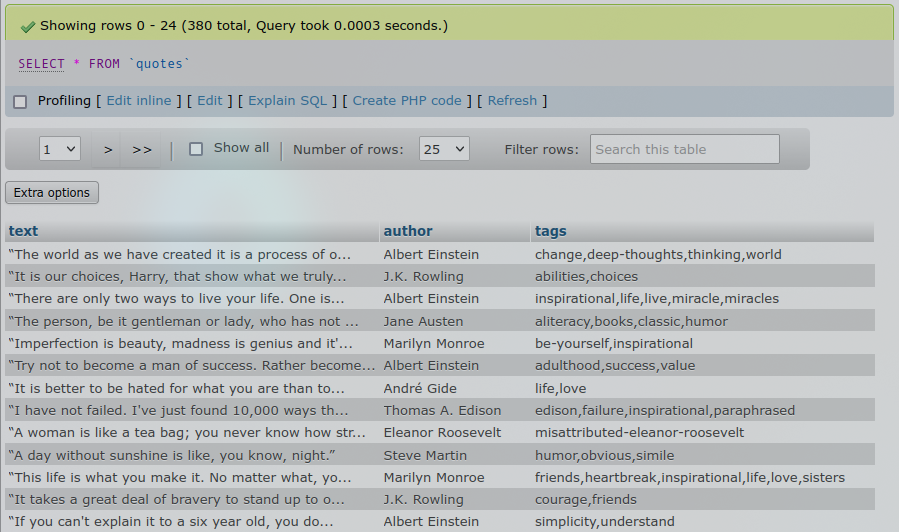

In [10]:
from IPython.display import Image

# Hiển thị hình ảnh
Image(filename='sql_database.png')


# Thực hành nội dung 1, 2 cho dự án cuối kỳ  

Chủ đề cuối kỳ nhóm em đã có dữ liệu (dữ liệu ảnh y tế chất lượng cao) nên không dùng crawl từ trang web khác.  
Việc tiếp theo bọn em làm với bộ dữ liệu đã có này là tiền xử lý, lọc nhiễu và gán nhãn dữ liệu cho các vùng ảnh cần quan tâm trong ảnh thu thập được để training model phân loại sau.